In [1]:
import numpy as np #statistical 
import pandas as pd #data frame numbers . head/tail 
from scipy import stats  
import matplotlib.pyplot as plt 
import seaborn as sns #visualisation graphs and plots
white_wine = pd.read_csv("wine+quality\winequality-white.csv", sep= ';', delimiter=None) 
ww1 = white_wine

In [2]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
#show shape 
row, col = white_wine.shape
display(row)
display(col)

4898

12

In [4]:
#show duplicates
white_wine.duplicated().sum()

937

In [5]:
#drop duplicates 
ww1.drop_duplicates(inplace=True)
ww1.duplicated().sum()

0

In [6]:
row, col = ww1.shape
display(row)
display(col)

3961

12

In [7]:
ww1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<function matplotlib.pyplot.show(close=None, block=None)>

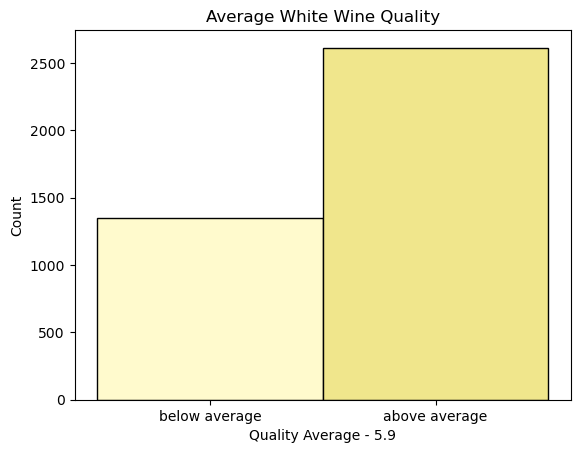

In [8]:
#using 5.9 as the mean
#rounded up from 5.87 
ww1['quality_label'] = ww1['quality'].apply(lambda value: 'below average'
if value <= 5.9 else 'above average')
ww1['quality_label'] = pd.Categorical(ww1['quality_label'], 
categories=['below average', 'above average']) 


h1 = sns.histplot(x = 'quality_label', data= ww1)
h1.patches[0].set_facecolor('lemonchiffon')
h1.patches[1].set_facecolor('khaki')
plt.xlabel("Quality Average - 5.9")
plt.ylabel("Count")
plt.title("Average White Wine Quality")
plt.show 

so this is what we are looking at. what scientific charachteristics put individual samples above the average in this data set. and is there a statistical significance that can be proven and transfered on to a different wine data sample. 

In [9]:
# oshow the below and above average value in the bars  

C:\Users\lmyhe\AppData\Local\Temp\ipykernel_2888\2379592911.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_white = ww1.corr().round(2)


<Axes: >

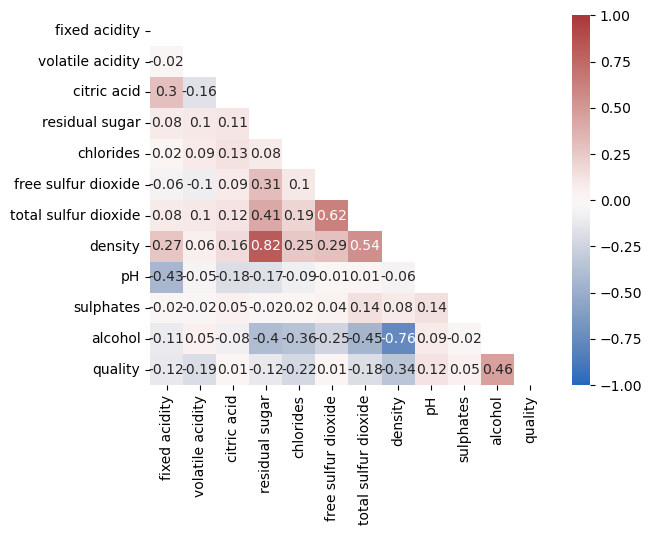

In [10]:
#heatmap to show possible correlations
matrix_white = ww1.corr().round(2)
mask = np.triu(np.ones_like(matrix_white, dtype=bool))
sns.heatmap(matrix_white, annot=True, vmax=1, vmin=-1, cmap='vlag', mask=mask)